## Model Selection using Advance Rrgression (Australian  Housing Market Case Study)

#### **Problem Statement:**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

*Essentially, the company wants —*

1.   Which variables are significant in predicting the price of a house, and
2.   How well those variables describe the price of a house.



#### **Business Goal :**

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### **Dataset characteristics / Attribute**

The details of the various variables are given in the file Linked. [data_description.txt](https://github.com/samrich76/Advanced-Regression-Assignment/blob/main/data_description.txt)


In [2]:
# Connecting to Google Drive to get the required CSV File for future reference 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# to display all the column 
pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

## Step 1: Reading and Understanding the Data

In [4]:
# Importing Housing.csv from my Google Drive 
housing_data = pd.read_csv('/content/drive/MyDrive/Upgrad/ML2/ML 2 Assignment/train.csv')

#Looking at the first five rows
housing_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [5]:
housing_data.shape

(1460, 81)

Inspect the various aspects of the Housing dataframe

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Checking for null value
housing_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
# Separating the Numerical and Categorical features for analysis
numeric_df = housing_data.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_data.select_dtypes(include=['object'])

In [10]:
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
numeric_df.apply(lambda x: len(x.unique()))

Id               1460
MSSubClass         15
LotFrontage       111
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        328
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        98
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [13]:
# We should drop below column  not make any sense might be single value 
numeric_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
# We should drop below column  not make any sense might be single value 
numeric_df[['LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','BsmtFinSF2','2ndFlrSF','BsmtHalfBath' ]].describe()

,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BsmtFinSF2,2ndFlrSF,BsmtHalfBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,5.844521,21.954110,3.409589,15.060959,2.758904,43.489041,46.549315,346.992466,0.057534
std,48.623081,61.119149,29.317331,55.757415,40.177307,496.123024,161.319273,436.528436,0.238753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,728.000000,0.000000
max,572.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,1474.000000,2065.000000,2.000000


## Step 2: Visualising the Data
Most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

#### **Outlier Detection :**

Checking percentage of outliers for all the numerical columns..

In [15]:
outliers_perc={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_perc[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_perc.keys()),'Percentage':list(outliers_perc.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


##### **Outlier Detection Comment :**

Majority of the numeric features have outliers

*   Dropping all the outliers will cause loss of information.
*   'SalePrice' is excluded 
*   Inter Quartile Range **(IQR)** = Difference between 75th percentile and 25th percentile values of a feature.
*   reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]



In [16]:
for feature,percentage in outliers_perc.items():
    if feature!='SalePrice':
        IQR = housing_data[feature].quantile(.75) - housing_data[feature].quantile(.25) 
        max_value = housing_data[feature].quantile(.75)+1.5*IQR
        min_value = housing_data[feature].quantile(.25)-1.5*IQR
        housing_data[feature][housing_data[feature] > max_value] = max_value
        housing_data[feature][housing_data[feature] < min_value ] = min_value

In [17]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,0.0,563.777740,1050.254795,1157.018151,346.789041,0.0,1503.735873,0.425000,0.0,1.565068,0.382877,2.851712,1.0,6.487671,0.611301,1978.506164,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,0.0,431.710214,397.937878,362.583002,435.791621,0.0,481.375641,0.517373,0.0,0.550916,0.502885,0.759516,0.0,1.541916,0.638959,24.689725,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,0.0,0.000000,42.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,0.0,1129.500000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,0.0,1464.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,0.0,1776.750000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,0.0,1685.500000,2052.000000,2155.125000,1820.000000,0.0,2747.625000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,2010.000000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


#### Coorelation Matrix

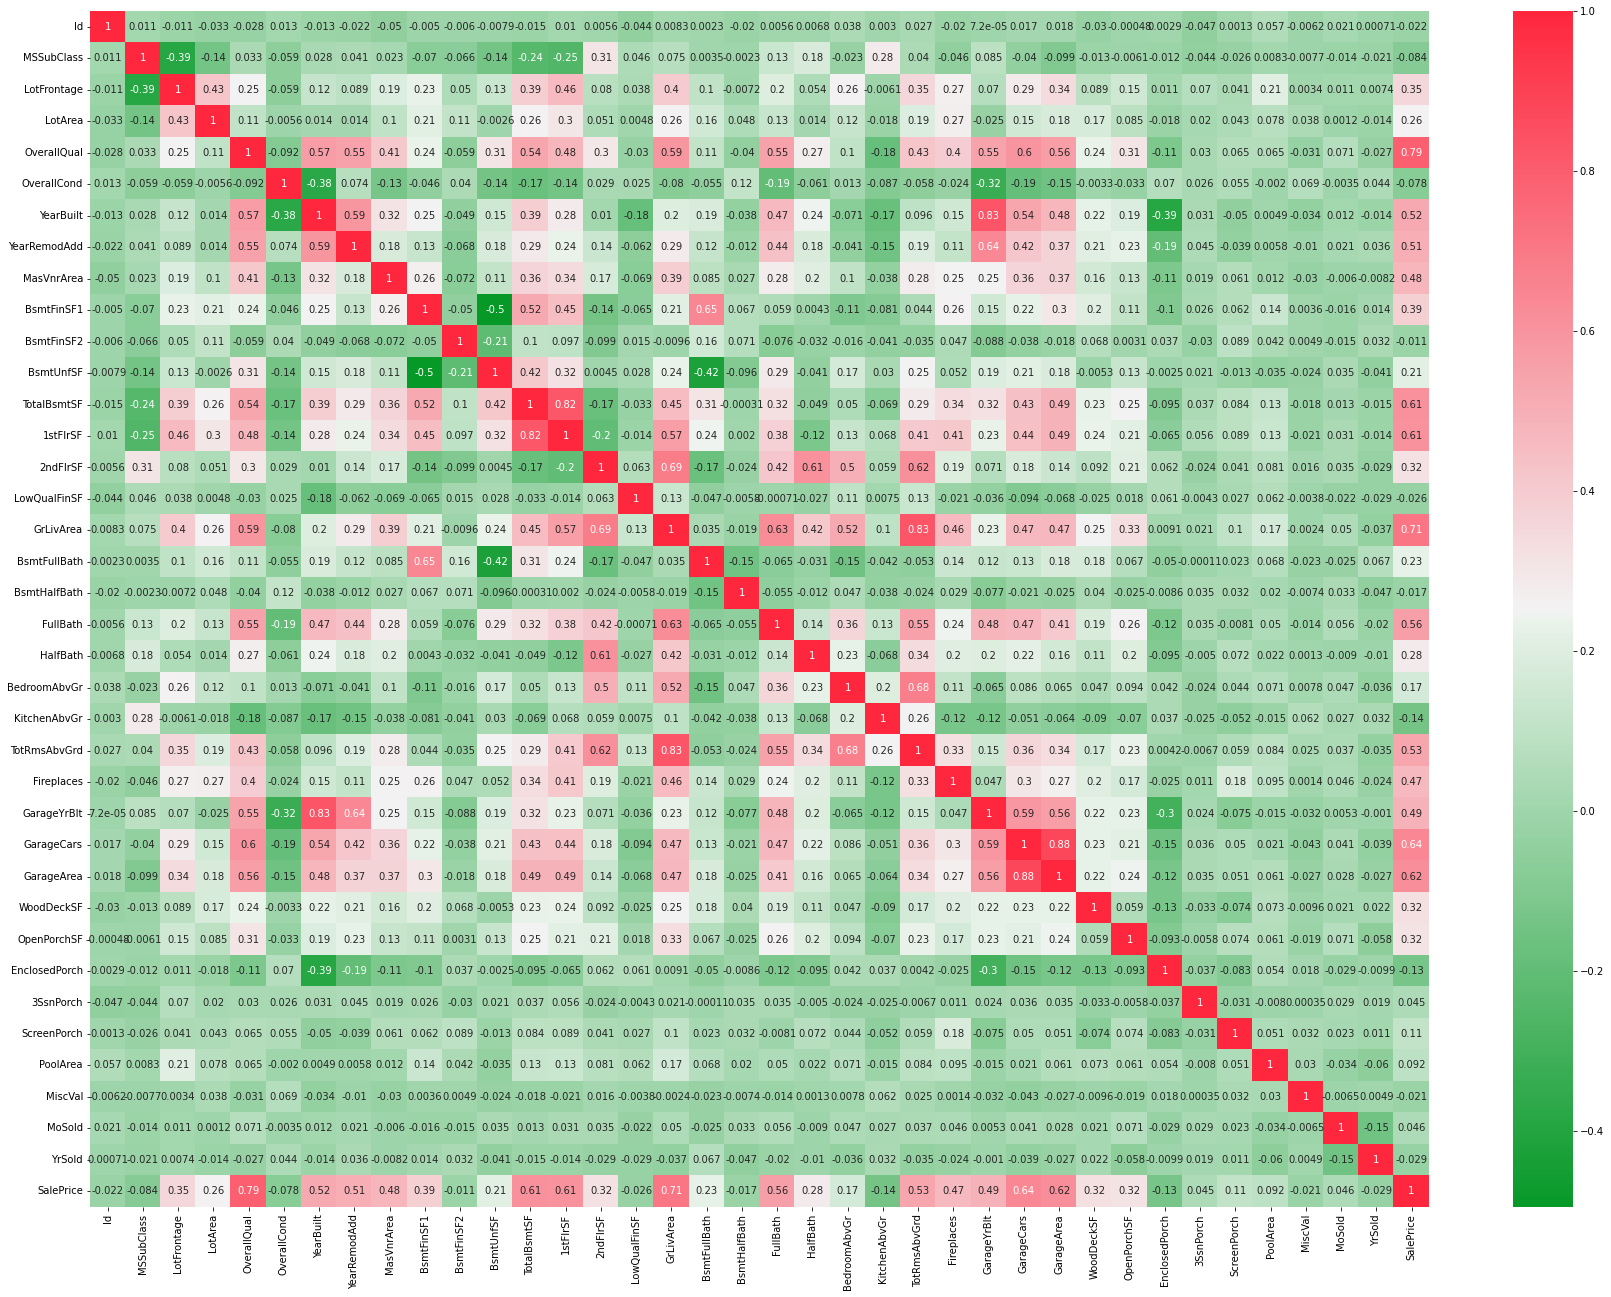

In [18]:
corr = numeric_df.corr()
plt.figure(figsize=(30,22))
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(corr, annot=True, annot_kws={'size':10},cbar=True,cmap=rdgn)
plt.show()

 
##### Looked at all the Coorelation which are above 70% (>70) 


*   GarageYrBlt  high Coor. with YearBuilt (0.83)
*   TotRmsAbvGrd high Coor. with GrLivArea(0.83) 
*   SalesPrice   high Coor. with OverallQual (.79)
*   1stFlrSt     high Coor. with TotalBsmtSF (0.82)
*   GrLiveAres  high Coor. with SalesPrice (0.71)




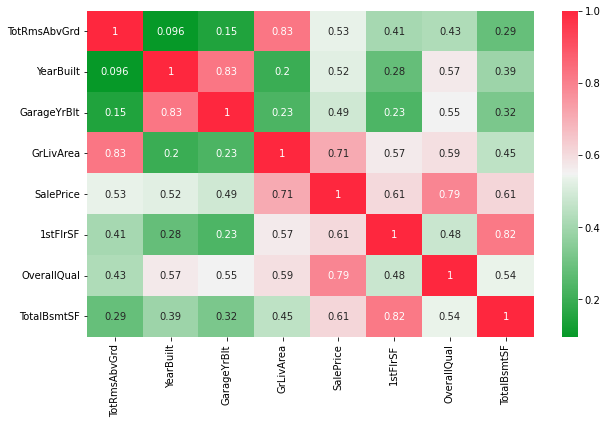

In [19]:
# Looking at the focused column
corr = numeric_df[['TotRmsAbvGrd','YearBuilt' ,'GarageYrBlt', 'GrLivArea','SalePrice','1stFlrSF','OverallQual', 'TotalBsmtSF']].corr()
plt.figure(figsize=(10,6))
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(corr, annot=True, annot_kws={'size':10},cbar=True,cmap=rdgn)
plt.show()

#### Continuous values

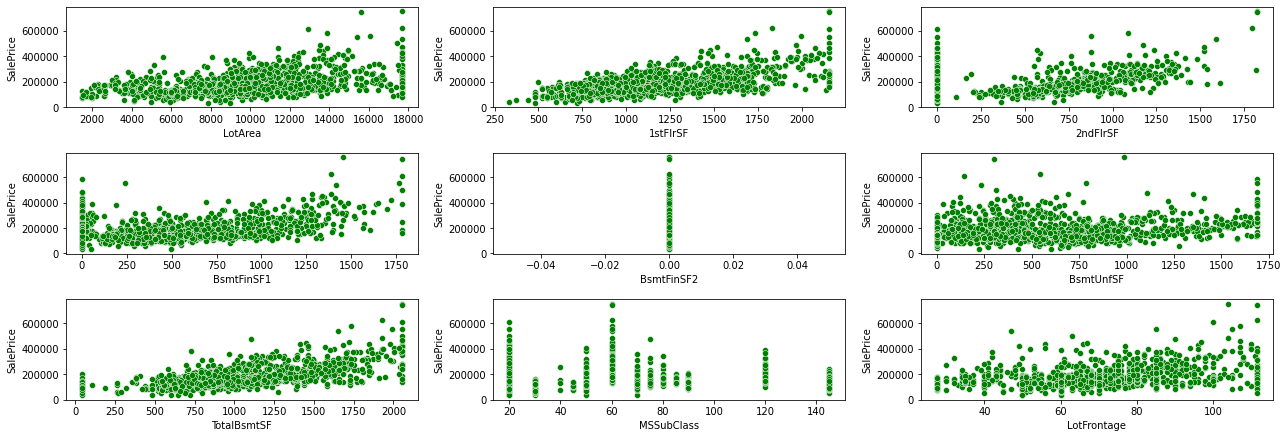

In [20]:
fig=plt.subplots(figsize=(18, 18))
# change int columns to category
cols = ['LotArea', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','MSSubClass', 'LotFrontage' ]

i = 0
for col in cols:
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.scatterplot(housing_data[col], housing_data['SalePrice'],color='g' )
    plt.tight_layout()
    i = i +1;

##### Analysis 1
1. BsmtFinSF2 has single variable that can be droppped 
2. 'LotArea', '1stFlrSF', '2ndFlrSF','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF' has linear relationship with **SalesPrice**

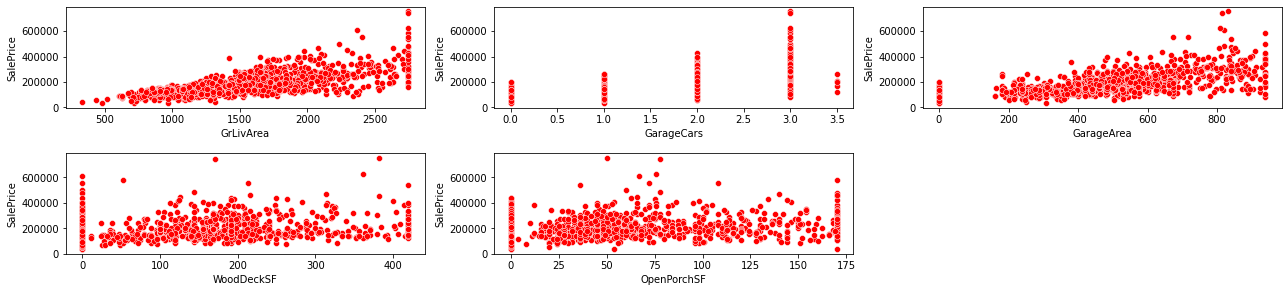

In [21]:
fig=plt.subplots(figsize=(18, 18))
# change int columns to category
cols = ['GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

i = 0
for col in cols:
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.scatterplot(housing_data[col], housing_data['SalePrice'],color='r' )
    plt.tight_layout()
    i = i +1;

##### Analysis 2
1. 'GrLivArea',  'GarageArea' has linear relationship with SalesPrice
2. 'GarageCars' has a categorical variabel 

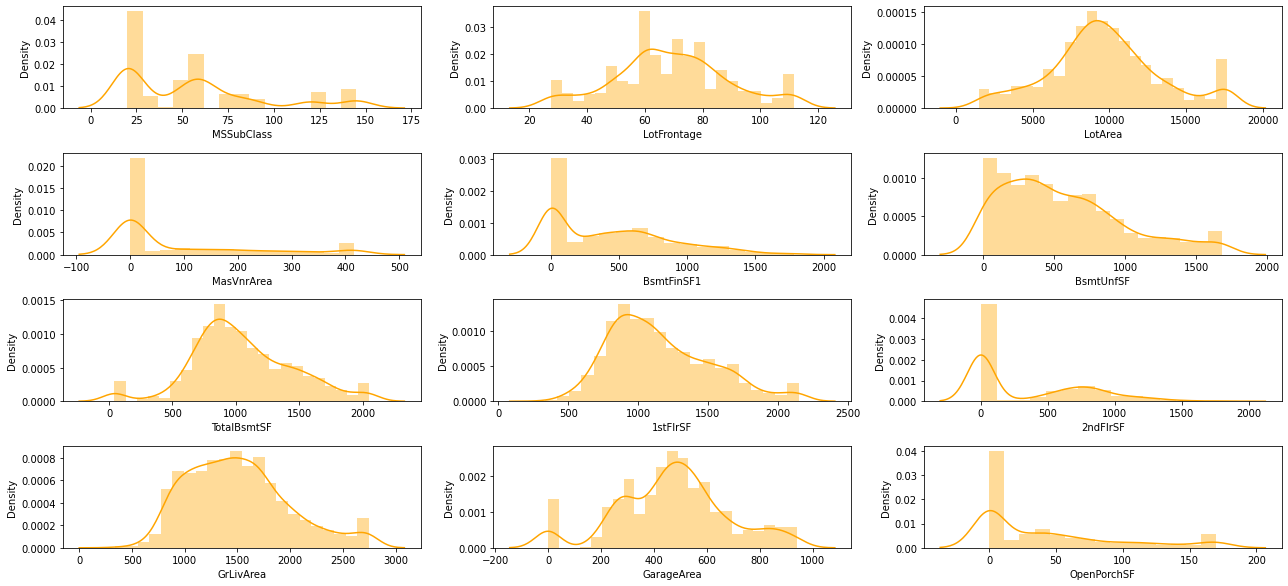

In [22]:
fig=plt.subplots(figsize=(18, 18))
# change int columns to category
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageArea', 'OpenPorchSF']

i = 0
for col in cols:
    plt.subplot(9, 3, i+1)
    sns.distplot(housing_data[col], color='Orange')
    plt.tight_layout()
    i = i +1;

##### Analysis 3
1. 'OpenProchSF', 2ndFlrSF, MSSubClass,MasVnrArea can be removed 
2. Other values are ok 

#### Dropping Not Required columns

In [23]:
housing_data.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

#### Analyzing Numerical values (Ordinal Numbers)

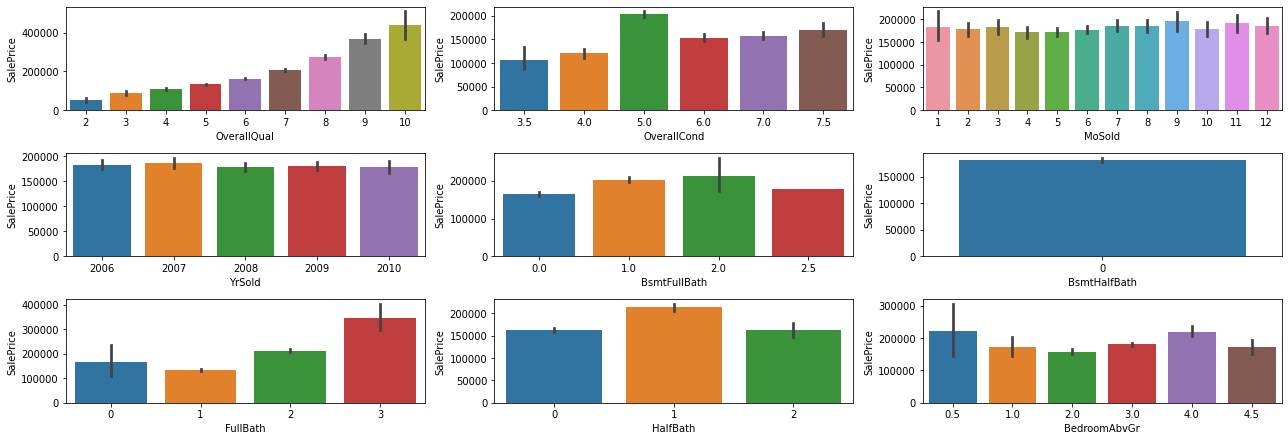

In [24]:
fig=plt.subplots(figsize=(18, 18))
# change int columns to category
cols = ['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr']

i = 0
for col in cols:
    plt.subplot(9, 3, i+1)
    sns.barplot(housing_data[col], housing_data['SalePrice'])
    plt.tight_layout()
    i = i +1;

##### Analysis 1

*   **OverallQual**: More the rating , more the SalePrice 
*   **OverallCond**: 5 and above has more Sales Price
*   **MoSold** & **YrSold** : no strong trend , All looks the same 
*   **FullBath** :  2 & 3 have highest SalePrice 😀

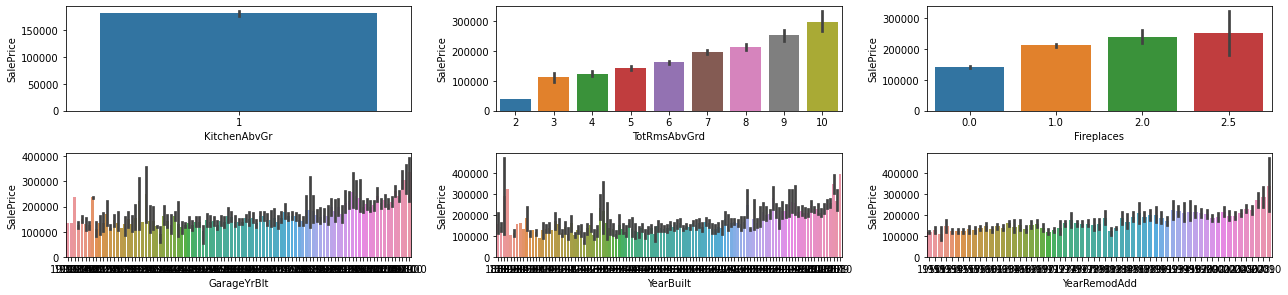

In [25]:
fig=plt.subplots(figsize=(18, 18))
# change int columns to category
cols = ['KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']

i = 0
for col in cols:
    plt.subplot(9, 3, i+1)
    sns.barplot(housing_data[col], housing_data['SalePrice'])
    plt.tight_layout()
    i = i +1;

##### Analysis 2

*   **TotRmsAbvGrd** : More rooms has more Sale Price
*   **Fireplaces** : More Fireplace 🔥 more Sales Price

below column need more analysis
'GarageYrBlt','YearBuilt','YearRemodAdd'



In [26]:
housing_data[['GarageYrBlt','YearBuilt','YearRemodAdd','SalePrice']]

,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
0,2003.0,2003,2003,208500
1,1976.0,1976,1976,181500
2,2001.0,2001,2002,223500
3,1998.0,1915,1970,140000
4,2000.0,2000,2000,250000
...,...,...,...,...
1455,1999.0,1999,2000,175000
1456,1978.0,1978,1988,210000
1457,1941.0,1941,2006,266500
1458,1950.0,1950,1996,142125


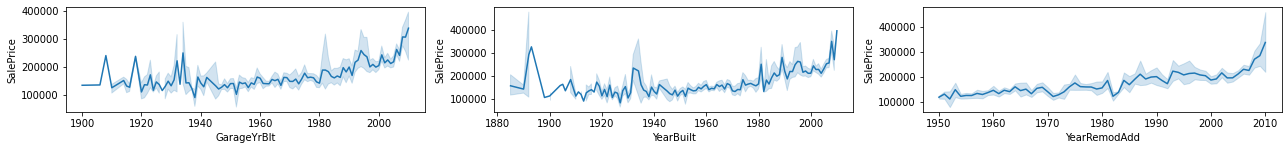

In [27]:
fig=plt.subplots(figsize=(18, 18))
# change int columns to category
cols = ['GarageYrBlt','YearBuilt','YearRemodAdd']

i = 0
for col in cols:
    plt.subplot(9, 3, i+1)
    sns.lineplot(data=housing_data, x=col, y="SalePrice", palette="rainbow")
    plt.tight_layout()
    i = i +1;

##### Analysis 3

*   **GarageYrBlt , YearBuilt , YearRemodAdd** : Newer the build/remodel has more sale price associated with the house 💲
*   No New house data available after 2000


In [28]:
# dropping KitchenAbvGr for not having useful information
housing_data.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [29]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    housing_data[feature] = 2021 - housing_data[feature]    

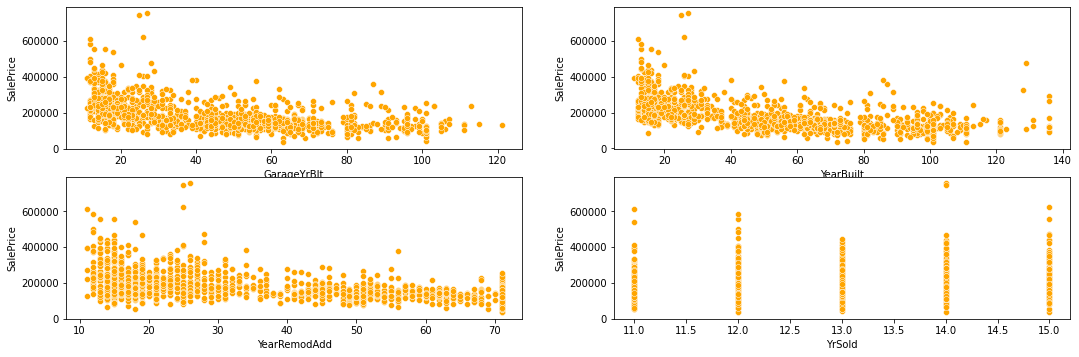

In [30]:
fig=plt.subplots(figsize=(18, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(housing_data[feature], housing_data['SalePrice'],color='Orange')


##### **Analysis 4**

*   Garage  built within last 20 years has more SalePrice 
*   SalePrice is more lower value of YearBuilt can see a trebd
*   Recently remodelled houses  have higher SalePrice
*   YrSold still does not show any significant trend 




#### Missing Value Handling - Numerical Features

In [31]:
for feat in housing_data.select_dtypes(exclude=['object']).columns:
    if housing_data[feat].isnull().any():
        print(feat, ' : ',  round(housing_data[feat].isnull().sum()/housing_data.shape[0], 2)*100)

LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [33]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice

housing_data = housing_data[~housing_data['MasVnrArea'].isnull()]
housing_data.drop(['Id'], axis=1, inplace=True)
numeric_df.drop(['Id'], axis=1, inplace=True)

KeyError: ignored

* GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars
* GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value
* TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea
* TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF
* Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage.

In [34]:
housing_data.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

#### Categorical Features

In [35]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in housing_data.select_dtypes(include=['object']).columns:
    if housing_data[feat].isnull().any():
        print(feat, ':', round(housing_data[feat].isnull().sum()/housing_data.shape[0], 2)*100)

Feature : Percentage of Missing Value
Alley : 94.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


##### Analysis 1
* For **Alley**, Nan means 'No access to alley'
* For **FireplaceQu, Fence** Nan means 'No Fire place' and 'No fence' respectively
* For **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2** Nan means 'No basement'
* For **GarageType, GarageFinish, GarageQual, GarageCond** Nan means 'No garage'
* **MiscFeature** - Nan means no additional features mentioned.

*All these features will be imputed with meaningful values in place of missing data.*

In [36]:
cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']

# Imputing missing values with "Not_applicable"
housing_data[cols] = housing_data[cols].fillna(value='Not_applicable', axis=1)

In [37]:
# Checking after imputation
housing_data[cols].isnull().sum()

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64

In [38]:
# dropping 'PoolQC' for very high percentage of missing value
housing_data.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical'
housing_data.dropna(subset=['Electrical'], inplace=True)

In [39]:
housing_data.columns.shape

(68,)

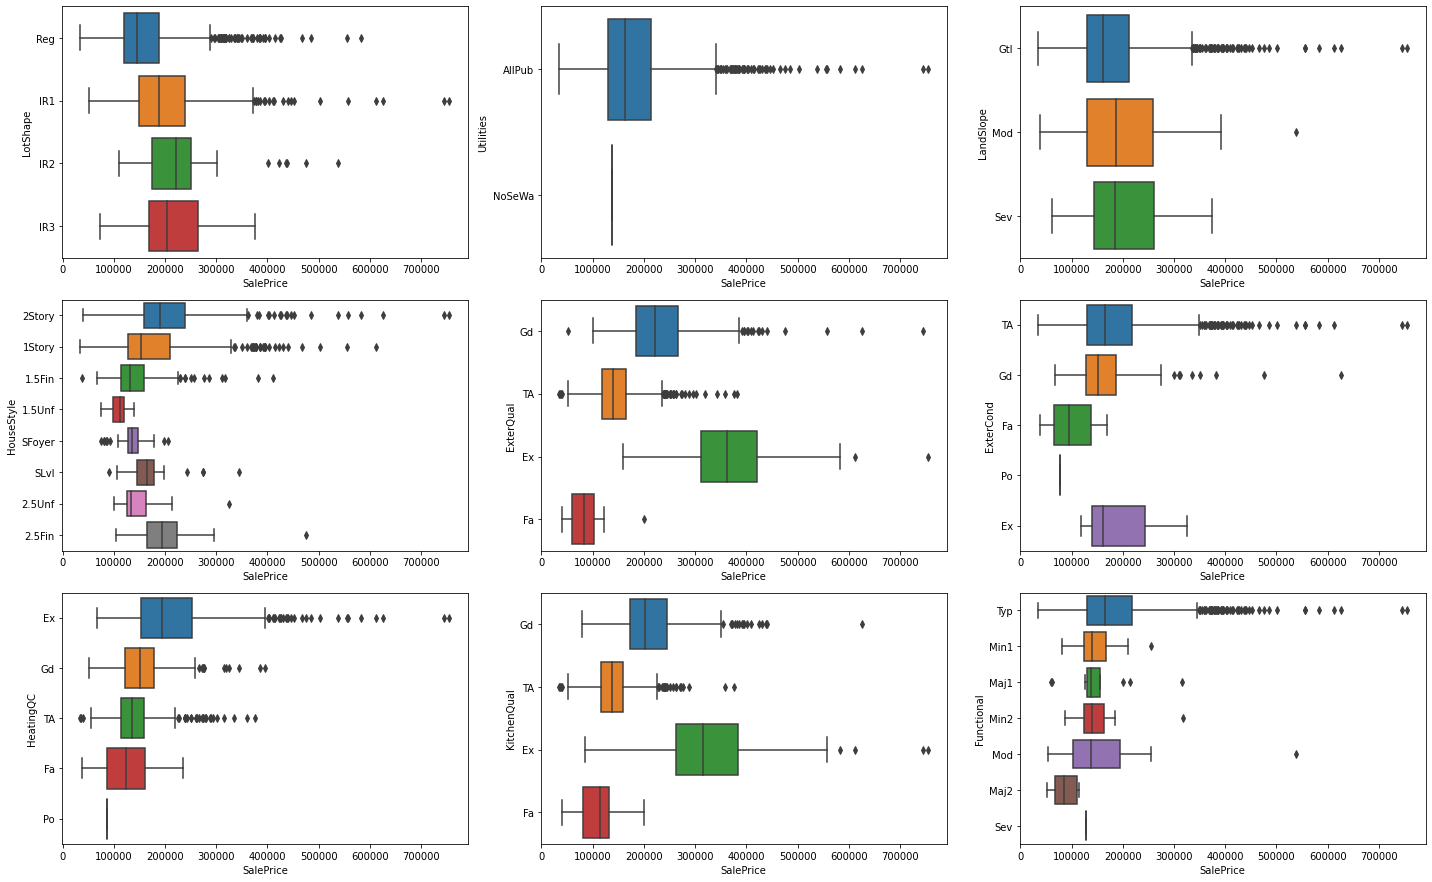

In [40]:
cols = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual','Functional']

fig=plt.subplots(figsize=(20, 16))
for i, feature in enumerate(cols):
  plt.subplot(4, 3, i+1)
  plt.subplots_adjust(hspace = 2.0)
  sns.boxplot(housing_data['SalePrice'], housing_data[feature])
  plt.tight_layout()

##### Analysis 2

**LotShape** : Slightly irregular LotShape (IR1) have the highest SalePrice 

**HouseStyle** : 1 & 2 storied houses have the highest SalePrice

**HeatingQC** : Excellent (Ex) has good sale proce
       
----------------------------

**Utilities** : Most  houses have  public utilities

**ExterQual** :  Excellent quality (Ex)  on the exterior have  highest SalePrice

**KitchenQual** : Kitchen quality (Ex) Good Sale Price and Gd has lot of variance 

----------------------------

**LandSlope** : Houses at (Gtl) slope have highest SalePrice

**ExterCond** : Houses with (Ex)  have the highest SalePrice

**Functional** : Typical Functionality (Typ)  highest SalePrice


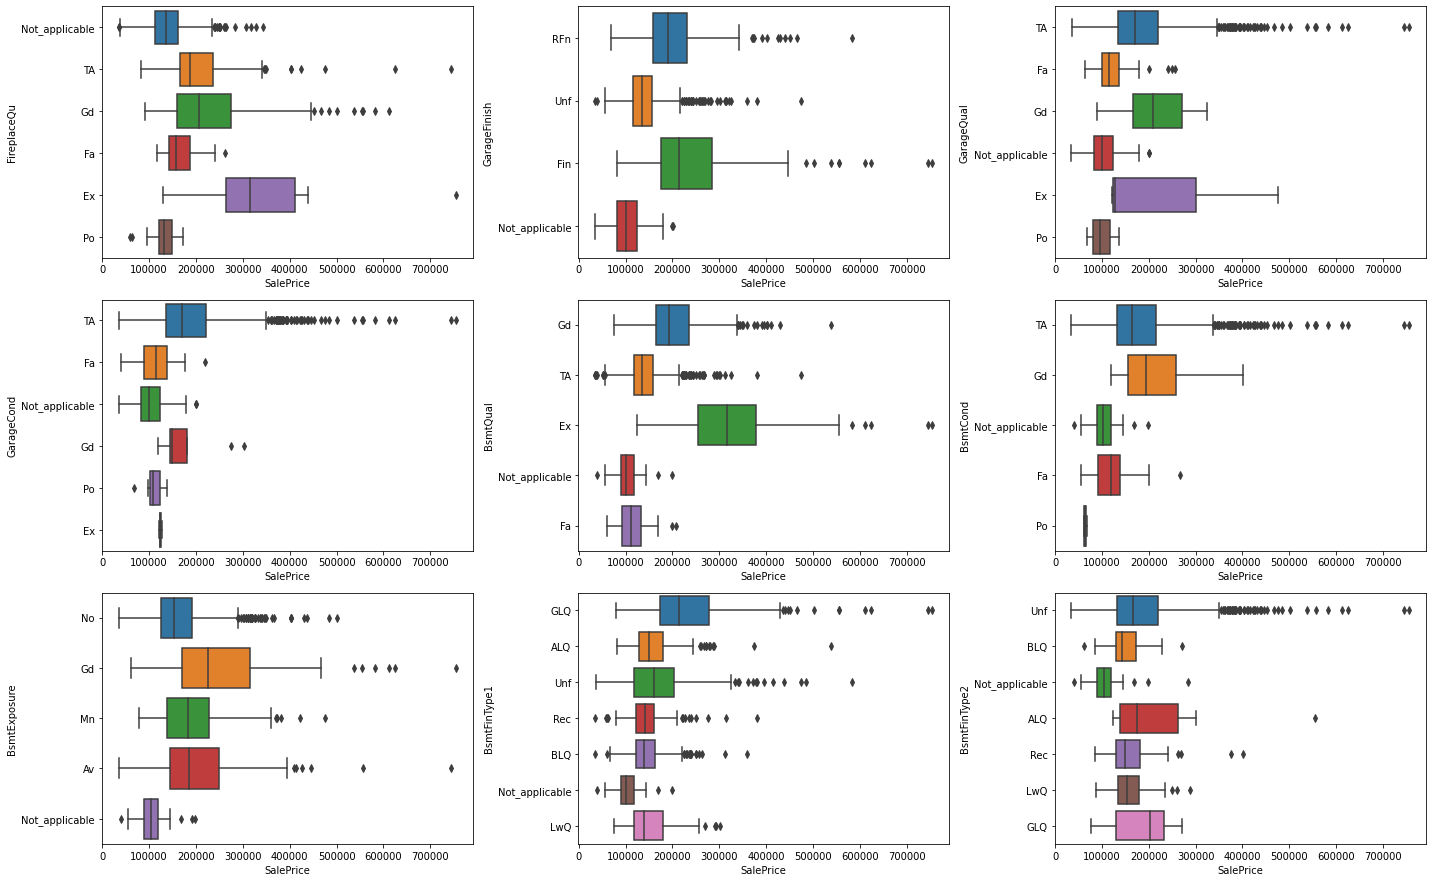

In [41]:
cols = ['FireplaceQu','GarageFinish', 'GarageQual','GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

fig=plt.subplots(figsize=(20, 16))
for i, feature in enumerate(cols):
  plt.subplot(4, 3, i+1)
  plt.subplots_adjust(hspace = 2.0)
  sns.boxplot(housing_data['SalePrice'], housing_data[feature])
  plt.tight_layout()

##### Analysis 3

**FireplaceQu** : Good (GD) has Range and Excellent (Ex) SalePrice is more

**GarageCond** : Typical/Average (TA) Sale Proce is more 👀

**BsmtExposure** : Good Exposure (Gd) has good sale price
       
----------------------------

**GarageFinish** : Finished (Fin) has good sale price

**BsmtQual** :  Excellent (100+ inches) (Ex)  has  highest SalePrice

**BsmtFinType1** : Good Living Quarters (GLQ) Good Sale Price a

----------------------------

**GarageQual** : Excellent(Ex)  highest SalePrice 😍

**BsmtCond** : Excellent (Ex) & Good (GD) have the highest SalePrice

**BsmtFinType1** : Average Living Quarters (ALQ)  highest SalePrice

#### **Encoding Categorical Features**

In [42]:
housing_data['LotShape'] = housing_data['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_data['Utilities'] = housing_data['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_data['LandSlope'] = housing_data['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_data['HouseStyle'] = housing_data['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_data['ExterQual'] = housing_data['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['ExterCond'] = housing_data['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['BsmtQual'] = housing_data['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtCond'] = housing_data['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['HeatingQC'] = housing_data['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['CentralAir'] = housing_data['CentralAir'].map({'N':0,'Y':1})
housing_data['KitchenQual'] = housing_data['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['GarageFinish'] = housing_data['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_data['GarageQual'] = housing_data['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['GarageCond'] = housing_data['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['Functional'] = housing_data['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [43]:
housing_data.shape

(1451, 68)

#### *Analyzing Unordered Featues*

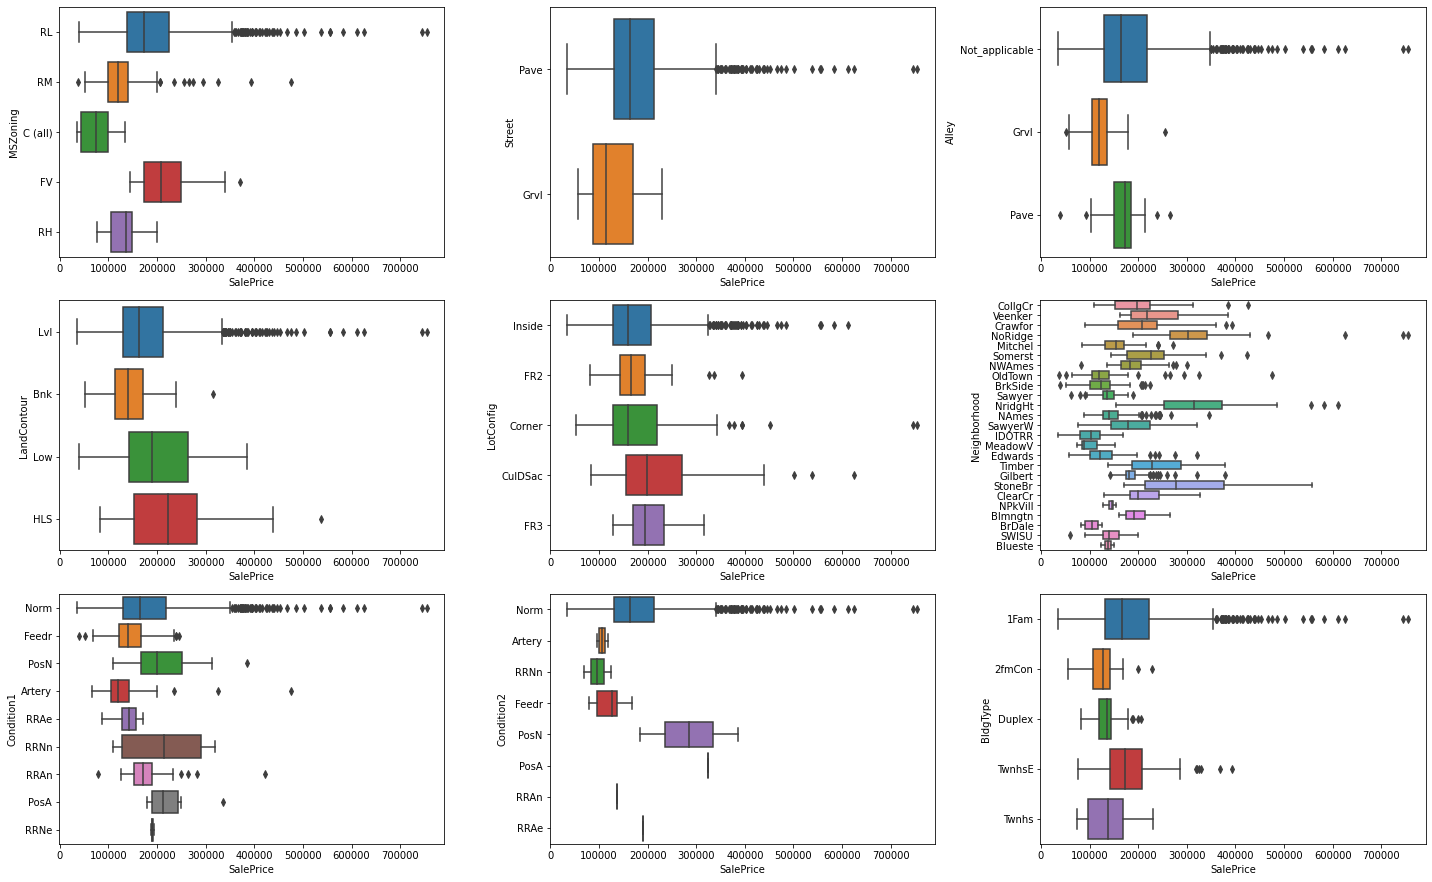

In [46]:
cols = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood','Condition1' , 'Condition2', 'BldgType']

fig=plt.subplots(figsize=(20, 16))
for i, feature in enumerate(cols):
  plt.subplot(4, 3, i+1)
  plt.subplots_adjust(hspace = 2.0)
  sns.boxplot(housing_data['SalePrice'], housing_data[feature])
  plt.tight_layout()

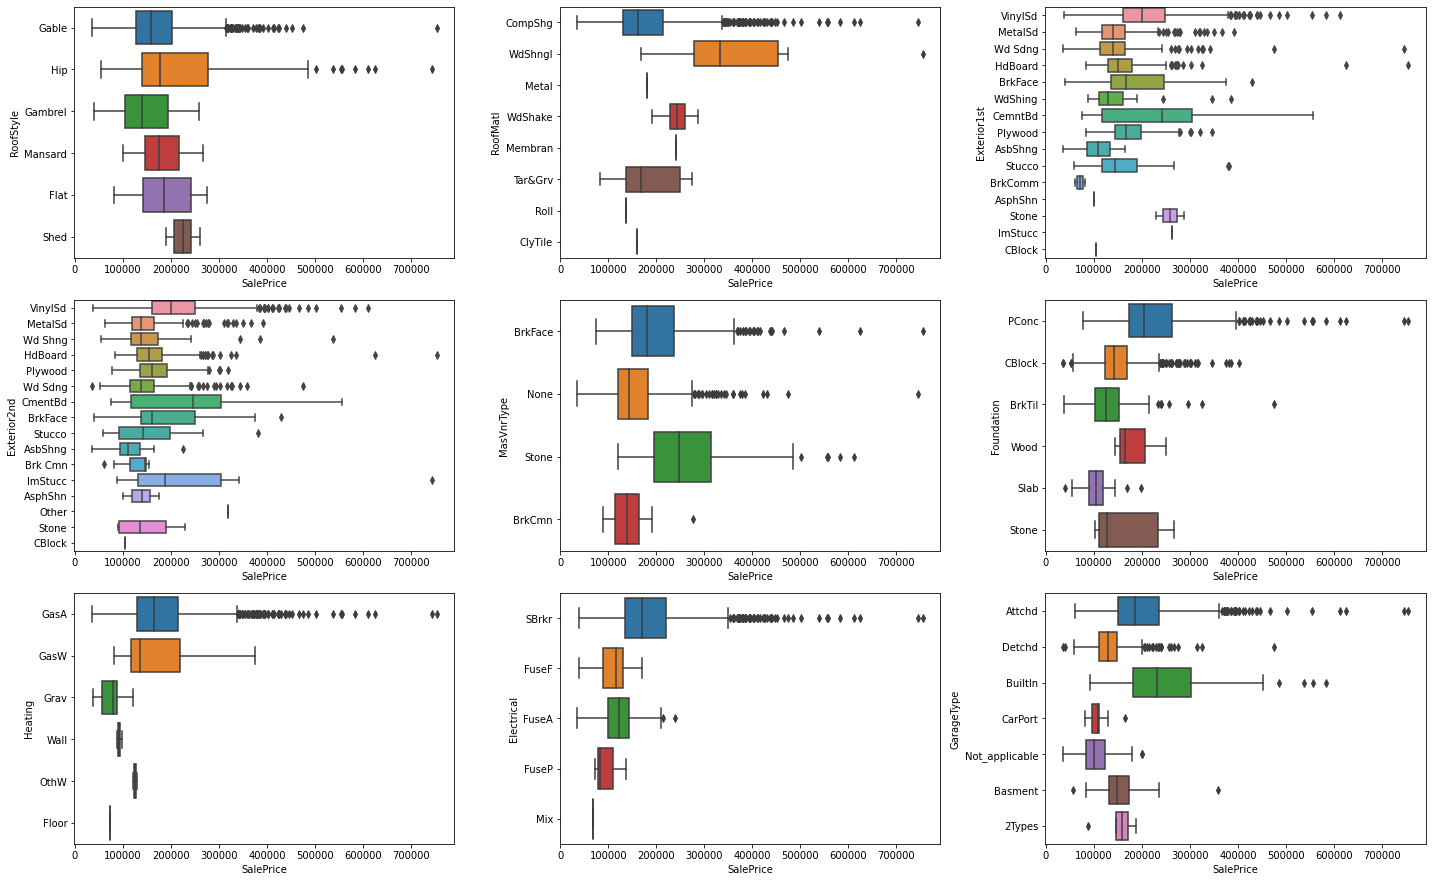

In [47]:
cols = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType']

fig=plt.subplots(figsize=(20, 16))
for i, feature in enumerate(cols):
  plt.subplot(4, 3, i+1)
  plt.subplots_adjust(hspace = 2.0)
  sns.boxplot(housing_data['SalePrice'], housing_data[feature])
  plt.tight_layout()

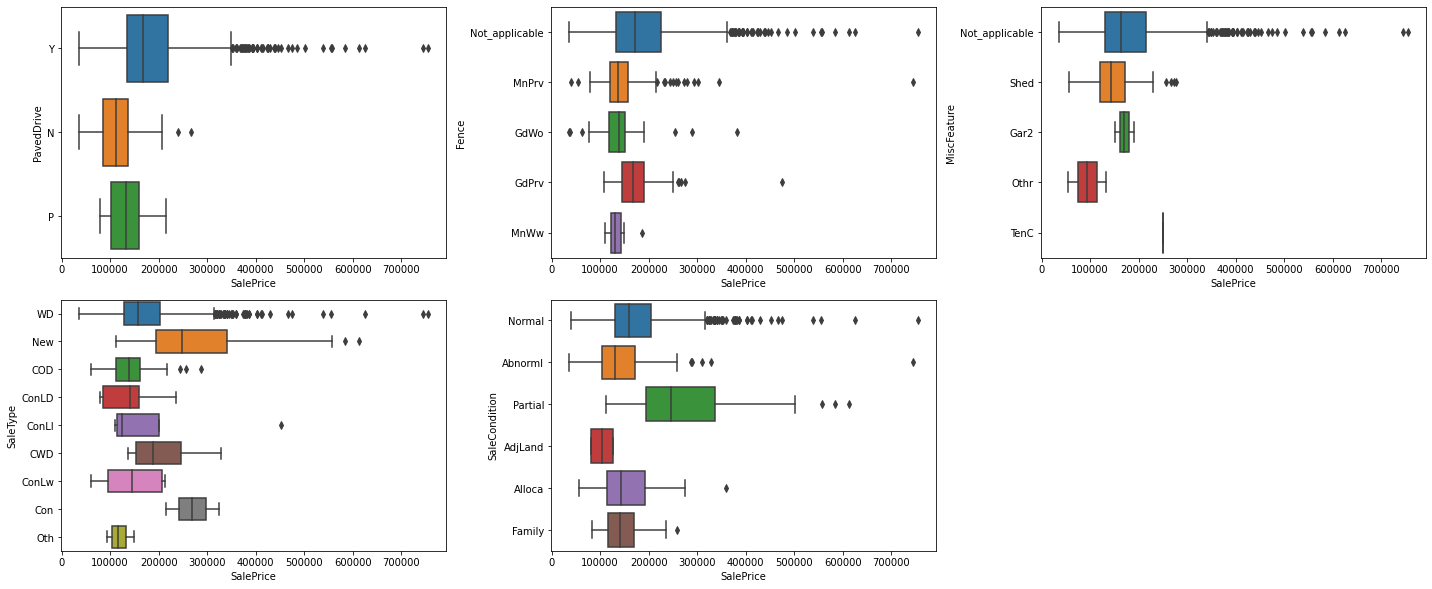

In [48]:
cols = ['PavedDrive', 'Fence','MiscFeature' , 'SaleType','SaleCondition']

fig=plt.subplots(figsize=(20, 16))
for i, feature in enumerate(cols):
  plt.subplot(4, 3, i+1)
  plt.subplots_adjust(hspace = 2.0)
  sns.boxplot(housing_data['SalePrice'], housing_data[feature])
  plt.tight_layout()

In [49]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']


In [51]:
dummy_df = pd.get_dummies(housing_data[unordered_features], drop_first=True)

In [52]:
dummy_df.shape

(1451, 144)

##### Analysis 

* Adding 144 features to the existing dataset will make the model very complex.
* From the above boxplots, for some categorical features only label is dominating over others.
* In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [53]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)

In [54]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

In [55]:
dummy_df.shape

(1451, 52)

In [56]:
# Adding the dummy variables to the original dataframe
housing_data = pd.concat([housing_data,dummy_df],axis=1)

# Dropping the redundant columns
housing_data = housing_data.drop(unordered_features,axis=1)

In [58]:
housing_data.shape

(1451, 97)

## Step 3: Splitting into Train and Test Data

In [59]:
X = housing_data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Not_applicable,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,18,18,196.0,3,2,4,3,1,6,706.0,1,0,150.0,4,1,856.0,854,1.0,0,2,1,3.0,3,8,0,0.0,0,2,548.0,3,3,0,61,2,13,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,7.5,45,45,0.0,2,2,4,3,4,5,978.0,1,0,284.0,4,1,1262.0,0,0.0,0,2,0,3.0,2,6,0,1.0,3,2,460.0,3,3,298,0,5,14,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5.0,20,19,162.0,3,2,4,3,2,6,486.0,1,0,434.0,4,1,920.0,866,1.0,0,2,1,3.0,3,6,0,1.0,3,2,608.0,3,3,0,42,9,13,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5.0,106,51,0.0,2,2,3,4,1,5,216.0,1,0,540.0,3,1,961.0,756,1.0,0,1,0,3.0,3,7,0,1.0,4,1,642.0,3,3,0,35,2,15,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,21,21,350.0,3,2,4,3,3,6,655.0,1,0,490.0,4,1,1145.0,1053,1.0,0,2,1,4.0,3,9,0,1.0,3,2,836.0,3,3,192,84,12,13,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0


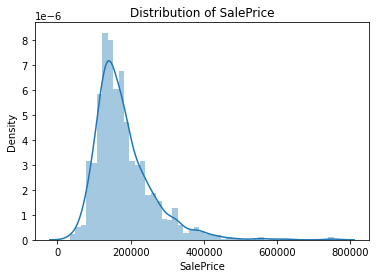

In [60]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_data['SalePrice'])
plt.show()

##### Comment: 
Since SalePrice is highly right skewed, distribution of transformed SalePrice will be applied

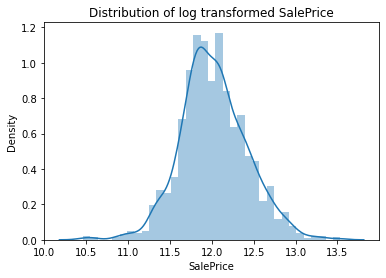

In [61]:
sns.distplot(np.log(housing_data['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [63]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building
y = np.log(housing_data['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1451, dtype: float64


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 96)
(291, 96)
(1160,)
(291,)


In [68]:
X['LotFrontage'].isnull().any()

True

In [66]:
# Inputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [70]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [71]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

#### Feature Scaling

In [72]:
X_train.values

array([[5.0000e+01, 5.4000e+01, 6.3420e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.4500e+02, 2.7500e+01, 2.5220e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 7.0000e+01, 7.9310e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [5.0000e+01, 5.0000e+01, 9.0000e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 4.8000e+01, 1.0635e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 6.7000e+01, 1.0656e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [73]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [74]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [82]:
# Checking the features after 

print(X_tr_scaled) # train data
print(X_te_scaled) # test data

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.137941    -0.840191 -0.892882  0.747271   0.029374  -0.225421   
1       2.389253    -2.335542 -1.956426  0.747271   0.029374  -0.225421   
2      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
3      -0.936002     0.000000 -0.396469 -1.386037   0.029374  -0.225421   
4      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
...          ...          ...       ...       ...        ...        ...   
1155    0.128080     0.683374  0.388382 -1.386037   0.029374  -0.225421   
1156    2.389253    -2.335542 -2.214237  0.747271   0.029374  -0.225421   
1157   -0.137941    -1.065905 -0.152856  0.747271   0.029374  -0.225421   
1158   -0.936002    -1.178761  0.302352 -0.674935   0.029374  -0.225421   
1159   -0.936002    -0.106623  0.308199 -1.386037   0.029374  -0.225421   

      HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.179294    -0.78734

## Initial Feature Selection with RFE

In [94]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, n_features_to_select=n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [96]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stF

In [97]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())   

In [98]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     268.2
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:45:05   Log-Likelihood:                 874.61
No. Observations:                1160   AIC:                            -1657.
Df Residuals:                    1114   BIC:                            -1425.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [99]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     243.0
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:45:24   Log-Likelihood:                 880.58
No. Observations:                1160   AIC:                            -1659.
Df Residuals:                    1109   BIC:                            -1401.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [100]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     230.3
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:45:33   Log-Likelihood:                 884.43
No. Observations:                1160   AIC:                            -1661.
Df Residuals:                    1106   BIC:                            -1388.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Comment:
 By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data.

In [103]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [104]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

## Step 4 Ridge Regression